In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
CB = CatBoostRegressor(verbose=False)

In [8]:
CB.fit(X_train, Y_train)

In [9]:
CB.score(X_test, Y_test)

0.9321231908683648

In [10]:
cb_results_train = CB.predict(X_train)

In [11]:
cb_results_test = CB.predict(X_test)

In [12]:
X_train_cb = X_train.assign(CB = cb_results_train)
X_train_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
2434,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,4.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,3.0,9.0,4.0,1629,85.0,10655,8,5,2003,2004,296.0,1124.0,479.0,1603.0,3206.0,1629,0,0,1.0,0.0,2,0,3,1,7,1,2003.0,3.0,880.0,0,0,0,0,0,0,0,278253.727154
809,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1190,58.0,7250,6,5,1993,1993,45.0,0.0,0.0,1181.0,1181.0,1190,0,0,0.0,0.0,2,0,3,1,6,1,1993.0,2.0,430.0,0,21,0,0,0,0,0,156714.074581
1631,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1433,80.0,9600,5,6,1961,1990,0.0,915.0,0.0,336.0,1251.0,1433,0,0,1.0,0.0,1,0,3,1,7,1,1961.0,2.0,441.0,144,0,205,0,0,0,0,153912.112223
2057,6.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1028,56.0,8960,5,6,1927,1950,0.0,0.0,0.0,1008.0,1008.0,1028,0,0,0.0,0.0,1,0,2,1,5,1,1927.0,2.0,360.0,0,0,130,0,0,0,0,107625.530521
303,10.0,2.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,2.0,4.0,1547,72.0,8640,7,5,2009,2009,0.0,24.0,0.0,732.0,756.0,764,783,0,0.0,0.0,2,1,3,1,7,0,2009.0,2.0,614.0,169,45,0,0,0,0,0,215371.609048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,7.0,1.0,9.0,4.0,864,60.0,9000,4,6,1971,1971,0.0,616.0,0.0,248.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,0,1974.0,2.0,528.0,0,0,0,0,0,0,0,117277.084148
2156,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,5.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1114,66.0,13695,5,5,2004,2004,0.0,646.0,0.0,468.0,1114.0,1114,0,0,1.0,0.0,1,1,3,1,6,0,2004.0,2.0,576.0,0,102,0,0,0,0,0,156520.227283
1955,5.0,5.0,1.0,1.0,0.0,2.0,0.0,4.0,1.0,4.0,2.0,2.0,0.0,2.0,1.0,6.0,9.0,9.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,0.0,9.0,4.0,1533,62.0,70761,7,5,1975,1975,0.0,655.0,0.0,878.0,1533.0,1533,0,0,1.0,0.0,2,0,2,1,5,2,1975.0,2.0,576.0,200,54,0,0,0,0,0,270389.470948
1180,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,1396,85.0,11069,6,5,2007,2007,0.0,0.0,0.0,608.0,608.0

In [13]:
X_test_cb = X_test.assign(CB = cb_results_test)
X_test_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
549,14.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,6.0,1.0,0.0,9.0,9.0,1.0,3.0,2.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,1110,68.516053,9101,5,6,1978,1978,104.0,1097.0,0.0,0.0,1097.0,1110,0,0,1.0,0.0,1,0,1,1,4,1,1978.0,2.0,602.0,303,30,0,0,0,0,0,167242.274480
1371,5.0,5.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,1537,74.000000,11563,8,5,2006,2007,258.0,1036.0,0.0,482.0,1518.0,1537,0,0,1.0,0.0,2,0,3,1,8,0,2007.0,3.0,788.0,0,26,0,0,0,0,0,264007.802924
707,0.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,9.0,2.0,2.0,3.0,2.0,1.0,0.0,13.0,14.0,2.0,2.0,4.0,1.0,2.0,5.0,1.0,2.0,3.0,1.0,2.0,1.0,4.0,4.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1235,68.516053,3760,8,5,1980,1980,0.0,1009.0,182.0,44.0,1235.0,1235,0,0,1.0,0.0,1,0,1,1,4,3,1980.0,2.0,484.0,133,78,0,0,0,0,0,200689.535124
1394,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,15.0,2.0,3.0,4.0,2.0,5.0,1.0,3.0,6.0,6.0,1.0,2.0,1.0,1.0,4.0,3.0,5.0,5.0,3.0,5.0,5.0,1.0,3.0,2.0,1.0,11.0,0.0,9.0,4.0,1550,66.000000,21780,6,5,1920,1950,0.0,0.0,0.0,817.0,817.0,940,610,0,0.0,0.0,1,1,3,1,7,1,1937.0,1.0,318.0,0,0,429,0,0,0,0,143518.756238
1159,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,3.0,9.0,4.0,2232,68.516053,11692,8,5,1993,1994,372.0,624.0,0.0,549.0,1173.0,1215,1017,0,1.0,0.0,2,1,3,1,8,1,1993.0,2.0,623.0,173,165,0,0,0,0,0,265233.631083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,2263,68.516053,9240,8,5,2001,2002,396.0,0.0,0.0,1055.0,1055.0,1055,1208,0,0.0,0.0,2,1,3,1,7,1,2001.0,2.0,905.0,0,45,0,0,189,0,0,263143.781648
1105,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,0.0,0.0,9.0,4.0,1008,66.000000,12778,5,6,1952,2003,0.0,658.0,0.0,350.0,1008.0,1008,0,0,1.0,0.0,1,0,2,1,4,0,1952.0,1.0,280.0,0,154,0,0,0,0,0,135076.205700
1271,5.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,3.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,1824,68.516053,115149,7,5,1971,2002,351.0,1219.0,0.0,424.0,1643.0,1824,0,0,1.0,0.0,2,0,2,1,5,2,1971.0,2.0,739.0,380,48,0,0,0,0,0,271264.991993
805,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,5.0,3.0,5.0,5.0,1.0,3.0,0.0,1.0,8.0,2

In [14]:
Y_train

2434    284000
809     166000
1631    161000
2057    115000
303     215200
         ...  
448     120500
2156    159000
1955    280000
1180    170000
1995    117500
Name: SalePrice, Length: 1935, dtype: int64

In [15]:
X_train_full = X_train_cb.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
2434,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,4.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,3.0,9.0,4.0,1629,85.0,10655,8,5,2003,2004,296.0,1124.0,479.0,1603.0,3206.0,1629,0,0,1.0,0.0,2,0,3,1,7,1,2003.0,3.0,880.0,0,0,0,0,0,0,0,278253.727154,284000
809,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1190,58.0,7250,6,5,1993,1993,45.0,0.0,0.0,1181.0,1181.0,1190,0,0,0.0,0.0,2,0,3,1,6,1,1993.0,2.0,430.0,0,21,0,0,0,0,0,156714.074581,166000
1631,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1433,80.0,9600,5,6,1961,1990,0.0,915.0,0.0,336.0,1251.0,1433,0,0,1.0,0.0,1,0,3,1,7,1,1961.0,2.0,441.0,144,0,205,0,0,0,0,153912.112223,161000
2057,6.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1028,56.0,8960,5,6,1927,1950,0.0,0.0,0.0,1008.0,1008.0,1028,0,0,0.0,0.0,1,0,2,1,5,1,1927.0,2.0,360.0,0,0,130,0,0,0,0,107625.530521,115000
303,10.0,2.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,2.0,4.0,1547,72.0,8640,7,5,2009,2009,0.0,24.0,0.0,732.0,756.0,764,783,0,0.0,0.0,2,1,3,1,7,0,2009.0,2.0,614.0,169,45,0,0,0,0,0,215371.609048,215200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,7.0,1.0,9.0,4.0,864,60.0,9000,4,6,1971,1971,0.0,616.0,0.0,248.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,0,1974.0,2.0,528.0,0,0,0,0,0,0,0,117277.084148,120500
2156,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,5.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,2.0,9.0,4.0,1114,66.0,13695,5,5,2004,2004,0.0,646.0,0.0,468.0,1114.0,1114,0,0,1.0,0.0,1,1,3,1,6,0,2004.0,2.0,576.0,0,102,0,0,0,0,0,156520.227283,159000
1955,5.0,5.0,1.0,1.0,0.0,2.0,0.0,4.0,1.0,4.0,2.0,2.0,0.0,2.0,1.0,6.0,9.0,9.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,3.0,0.0,9.0,4.0,1533,62.0,70761,7,5,1975,1975,0.0,655.0,0.0,878.0,1533.0,1533,0,0,1.0,0.0,2,0,2,1,5,2,1975.0,2.0,576.0,200,54,0,0,0,0,0,270389.470948,280000
1180,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0

In [16]:
X_test_full = X_test_cb.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
549,14.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,6.0,1.0,0.0,9.0,9.0,1.0,3.0,2.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,9.0,3.0,9.0,4.0,1110,68.516053,9101,5,6,1978,1978,104.0,1097.0,0.0,0.0,1097.0,1110,0,0,1.0,0.0,1,0,1,1,4,1,1978.0,2.0,602.0,303,30,0,0,0,0,0,167242.274480,165500
1371,5.0,5.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,12.0,13.0,3.0,2.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,2.0,9.0,4.0,1537,74.000000,11563,8,5,2006,2007,258.0,1036.0,0.0,482.0,1518.0,1537,0,0,1.0,0.0,2,0,3,1,8,0,2007.0,3.0,788.0,0,26,0,0,0,0,0,264007.802924,294000
707,0.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,9.0,2.0,2.0,3.0,2.0,1.0,0.0,13.0,14.0,2.0,2.0,4.0,1.0,2.0,5.0,1.0,2.0,3.0,1.0,2.0,1.0,4.0,4.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,0.0,9.0,4.0,1235,68.516053,3760,8,5,1980,1980,0.0,1009.0,182.0,44.0,1235.0,1235,0,0,1.0,0.0,1,0,1,1,4,3,1980.0,2.0,484.0,133,78,0,0,0,0,0,200689.535124,214000
1394,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,13.0,15.0,2.0,3.0,4.0,2.0,5.0,1.0,3.0,6.0,6.0,1.0,2.0,1.0,1.0,4.0,3.0,5.0,5.0,3.0,5.0,5.0,1.0,3.0,2.0,1.0,11.0,0.0,9.0,4.0,1550,66.000000,21780,6,5,1920,1950,0.0,0.0,0.0,817.0,817.0,940,610,0,0.0,0.0,1,1,3,1,7,1,1937.0,1.0,318.0,0,0,429,0,0,0,0,143518.756238,195000
1159,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,3.0,9.0,4.0,2232,68.516053,11692,8,5,1993,1994,372.0,624.0,0.0,549.0,1173.0,1215,1017,0,1.0,0.0,2,1,3,1,8,1,1993.0,2.0,623.0,173,165,0,0,0,0,0,265233.631083,263550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,2263,68.516053,9240,8,5,2001,2002,396.0,0.0,0.0,1055.0,1055.0,1055,1208,0,0.0,0.0,2,1,3,1,7,1,2001.0,2.0,905.0,0,45,0,0,189,0,0,263143.781648,287000
1105,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,0.0,0.0,9.0,4.0,1008,66.000000,12778,5,6,1952,2003,0.0,658.0,0.0,350.0,1008.0,1008,0,0,1.0,0.0,1,0,2,1,4,0,1952.0,1.0,280.0,0,154,0,0,0,0,0,135076.205700,139500
1271,5.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,3.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,1824,68.516053,115149,7,5,1971,2002,351.0,1219.0,0.0,424.0,1643.0,1824,0,0,1.0,0.0,2,0,2,1,5,2,1971.0,2.0,739.0,380,48,0,0,0,0,0,271264.991993,302000
805,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,0.0

In [17]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
2434,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,4.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,3.0,9.0,4.0,1629,85.000000,10655,8,5,2003,2004,296.0,1124.0,479.0,1603.0,3206.0,1629,0,0,1.0,0.0,2,0,3,1,7,1,2003.0,3.0,880.0,0,0,0,0,0,0,0,278253.727154,284000
809,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,3.0,9.0,4.0,1190,58.000000,7250,6,5,1993,1993,45.0,0.0,0.0,1181.0,1181.0,1190,0,0,0.0,0.0,2,0,3,1,6,1,1993.0,2.0,430.0,0,21,0,0,0,0,0,156714.074581,166000
1631,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,1433,80.000000,9600,5,6,1961,1990,0.0,915.0,0.0,336.0,1251.0,1433,0,0,1.0,0.0,1,0,3,1,7,1,1961.0,2.0,441.0,144,0,205,0,0,0,0,153912.112223,161000
2057,6.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1028,56.000000,8960,5,6,1927,1950,0.0,0.0,0.0,1008.0,1008.0,1028,0,0,0.0,0.0,1,0,2,1,5,1,1927.0,2.0,360.0,0,0,130,0,0,0,0,107625.530521,115000
303,10.0,2.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,2.0,4.0,1547,72.000000,8640,7,5,2009,2009,0.0,24.0,0.0,732.0,756.0,764,783,0,0.0,0.0,2,1,3,1,7,0,2009.0,2.0,614.0,169,45,0,0,0,0,0,215371.609048,215200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,2.0,9.0,4.0,2263,68.516053,9240,8,5,2001,2002,396.0,0.0,0.0,1055.0,1055.0,1055,1208,0,0.0,0.0,2,1,3,1,7,1,2001.0,2.0,905.0,0,45,0,0,189,0,0,263143.781648,287000
1105,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,0.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,0.0,0.0,9.0,4.0,1008,66.000000,12778,5,6,1952,2003,0.0,658.0,0.0,350.0,1008.0,1008,0,0,1.0,0.0,1,0,2,1,4,0,1952.0,1.0,280.0,0,154,0,0,0,0,0,135076.205700,139500
1271,5.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,9.0,9.0,3.0,3.0,4.0,1.0,2.0,5.0,1.0,2.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,5.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,1824,68.516053,115149,7,5,1971,2002,351.0,1219.0,0.0,424.0,1643.0,1824,0,0,1.0,0.0,2,0,2,1,5,2,1971.0,2.0,739.0,380,48,0,0,0,0,0,271264.991993,302000
805,11.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,0.0,11.0,12.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,0.0,6.0,1.0,

In [18]:
X_gb = combo.drop(['SalePrice'], axis=1)
y_gb = combo.SalePrice

In [19]:
X_gb.shape

(2580, 80)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_gb, y_gb,test_size=0.25, random_state=5)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
gbm = GradientBoostingRegressor()

In [22]:
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [23]:
GBM_Score

0.9684182512978841

In [24]:
predicted_value = gbm.predict(X_test_scaled)

In [25]:
true_value = Y_test

In [26]:
mae = mean_absolute_error(Y_test, predicted_value)

In [27]:
mape = mean_absolute_percentage_error(Y_test, predicted_value)

In [28]:
mape

0.049745241999106425

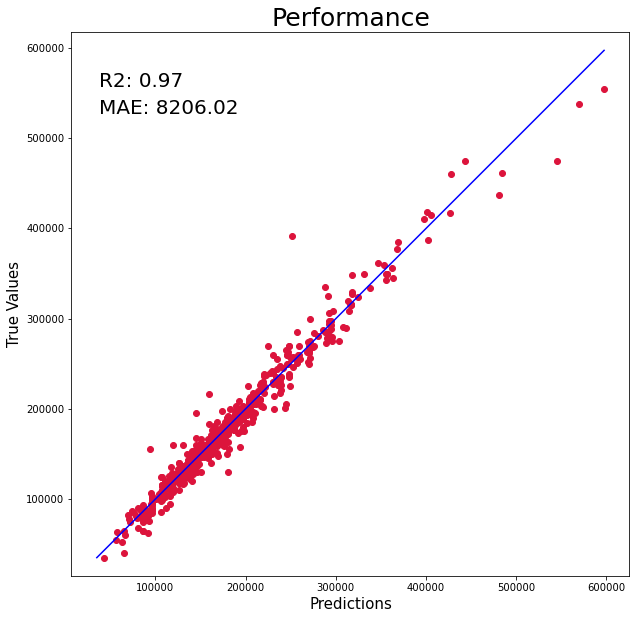

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Performance', fontsize=25)
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str(round(GBM_Score,2)), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=20)
plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=20)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()

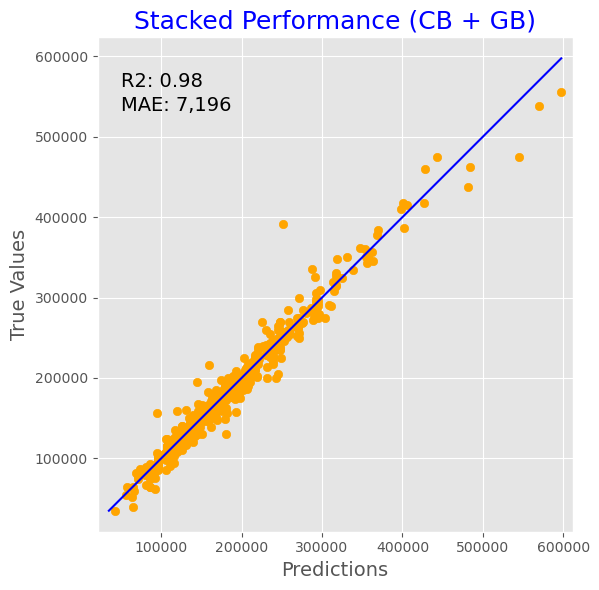

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(predicted_value, true_value, c='orange')
#plt.yscale('log')
#plt.xscale('log')

plt.style.use('default')
plt.style.use('ggplot')

plt.title('Stacked Performance (CB + GB)', fontsize=18, color='blue')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str('0.98'), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=14)
plt.annotate('MAE: ' + str('7,196'), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show();